In [12]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display
import glob

In [22]:
def displayMFCCS():
    for filename in glob.glob('*.wav'):
        y, sr = librosa.load(filename)
        y_harmonic, y_percussive = librosa.effects.hpss(y)
        C = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)
        tempo, beats = librosa.beat.beat_track(y=y_percussive, sr=sr)
        C_sync = librosa.util.sync(C, beats, aggregate=np.min)
        
        plt.figure(figsize=(12,6))
        plt.subplot(2, 1, 1)
        librosa.display.specshow(C, sr=sr, y_axis='chroma', vmin=0.0, vmax=1.0, x_axis='time')
        plt.title(filename + " "+ 'Chroma')
        plt.colorbar()

        plt.subplot(2, 1, 2)
        librosa.display.specshow(C_sync, y_axis='chroma', vmin=0.0, vmax=1.0, x_axis='time', 
                                 x_coords=librosa.frames_to_time(librosa.util.fix_frames(beats)))
        plt.title(filename + " "+ 'Beat-synchronous Chroma')

        plt.colorbar()
        plt.tight_layout()

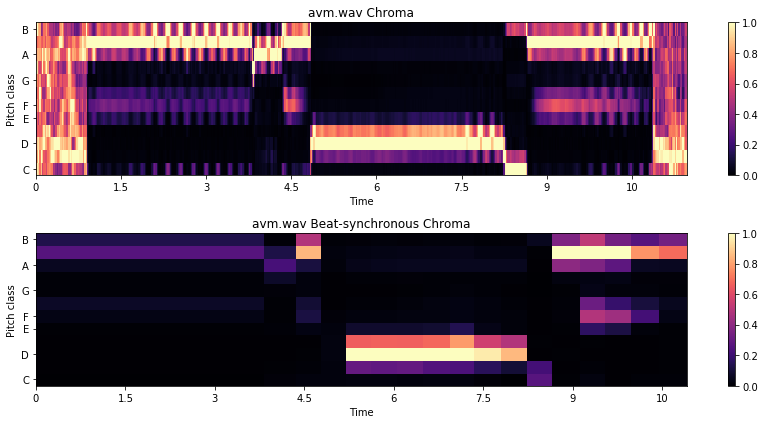

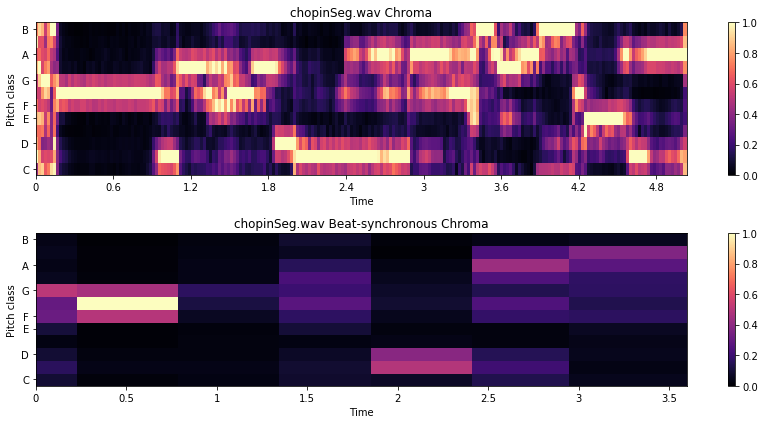

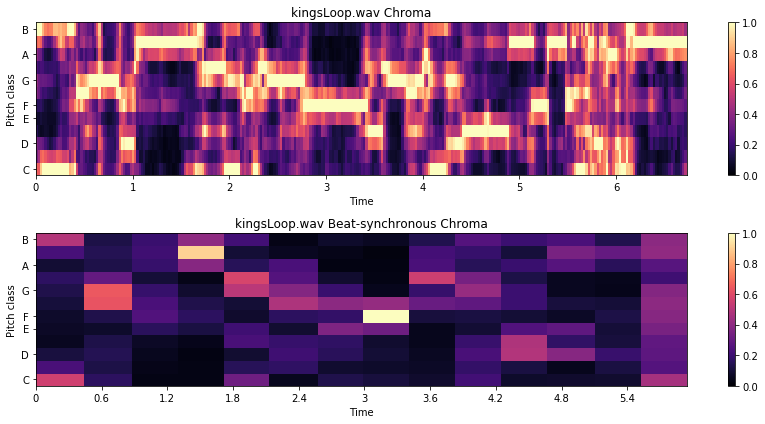

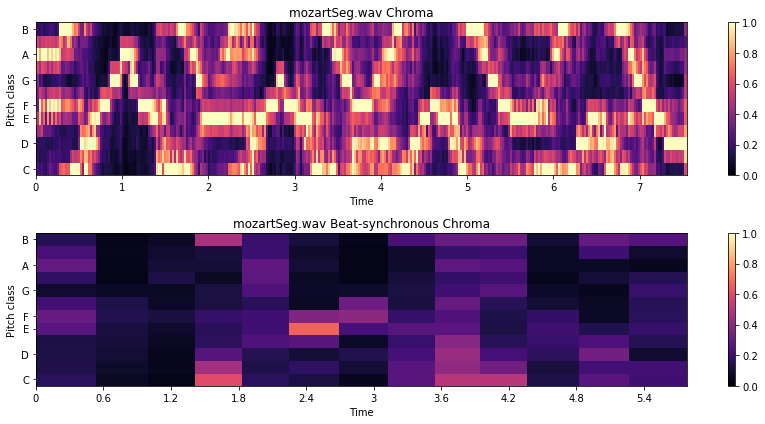

In [23]:
displayMFCCS()